In [23]:
#calculate dpa through SRIM simulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 


0       5.001
1      10.001
2      15.001
3      20.001
4      25.001
       ...   
95    480.001
96    485.001
97    490.001
98    495.001
99    500.001
Name: depth, Length: 100, dtype: float64
      depth      V_Ni        V1        V2           dpa
0     5.001  0.061045  0.373530  0.993758  1.511464e-03
1    10.001  0.064756  0.500043  1.340790  2.016497e-03
2    15.001  0.066107  0.581600  1.588960  2.366844e-03
3    20.001  0.069250  0.621905  1.703720  2.534259e-03
4    25.001  0.071056  0.662624  1.816780  2.698899e-03
..      ...       ...       ...       ...           ...
95  480.001  0.000000  0.000228  0.000768  1.053310e-06
96  485.001  0.000000  0.000192  0.000619  8.576963e-07
97  490.001  0.000000  0.000057  0.000135  2.031384e-07
98  495.001  0.000000  0.000071  0.000121  2.031381e-07
99  500.001  0.000000  0.000107  0.000213  3.385640e-07

[100 rows x 5 columns]
0     0.001511
2     0.002367
4     0.002699
6     0.003055
8     0.003210
10    0.003629
12    0.003854
14  

/usr/lib/python3/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


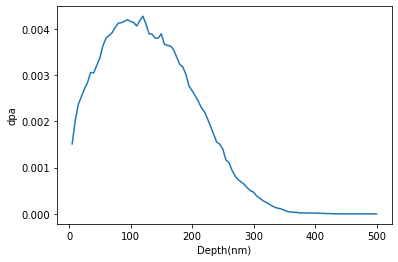

In [2]:
#full cascade
path='/home/heruhe/Desktop/Ga2o3/combine_cells/SRIM/SRIM_DATA/full_cascade_beta_ga2o3_ni_400kev_2101'
fn=path+'/VACANCY.txt'
# Read the CSV file with specified parameters
df = pd.read_csv(fn, skiprows=29, nrows=100, sep='  ', names=['depth','V_Ni' ,'V1', 'V2'],header=None)

# Assuming 'df' is your DataFrame
for column in df.columns:
    # Replace commas with dots as decimal separator
    df[column] = df[column].str.replace(',', '.')
    
    # Convert to numeric
    df[column] = pd.to_numeric(df[column], errors='coerce')
df['depth']=df['depth']/10
print(df['depth'])
#flunce=2.5*10**14
flunce=10**12
atom_density=9.45*10**22
df['dpa']=(df['V_Ni']+df['V1']+df['V2'])*flunce/atom_density*10**8
plt.plot(df['depth'],df['dpa'])
plt.xlabel('Depth(nm)')
plt.ylabel('dpa')
print(df)
# Extract every two rows to obtain srim dpa
srim_dpa = df.iloc[::2].iloc[:40]['dpa']
print(srim_dpa)
plt.savefig('/home/heruhe/Desktop/Ga2o3/combine_cells/SRIM/SRIM_DATA/full_cascade_beta_ga2o3_ni_400kev_2101/2_10_14.png', transparent=True)

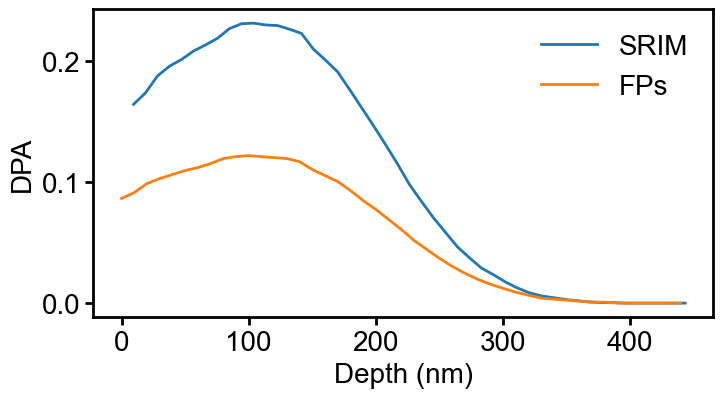

In [26]:
#quick cascade
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams["font.family"] = "arial"
plt.figure(figsize=(8, 4))
fluence=1e14
path='/Users/ruhe/Desktop/ga2o3/rbs'
fn=path+'/400keV-Ni-Ga2O3-KP-He.txt'
# Read the CSV file with specified parameters
df = pd.read_csv(fn, skiprows=4,  sep=r'\s+', names=['depth','dpa'],header=None)
srim_dpa=df['dpa']/(2*10**13)*fluence
plt.plot(df['depth'],srim_dpa,label='SRIM',linewidth=2)
plt.xlabel('Depth (nm)',fontsize=20)
plt.ylabel('DPA',fontsize=20)
plt.plot([i*10 for i in range(45)],(pkal*0.6*26.4*16/28*3+pkal*0.6*26.4*12/28*0.5+pkal*0.4*38.754*3/4*3+pkal*0.4*38.754*1/4*0.5)/81920,label='FPs',linewidth=2)
plt.legend(fontsize=20,frameon=False)
plt.tick_params( width=2,length=6,labelsize=20)

In [20]:
(pkal*0.6*26.4*16/28*1.5+pkal*0.6*26.4*12/28*0.5+pkal*0.4*38.754*3/4*1.5+pkal*0.4*38.754*1/4*0.5)/81920

array([0.23250216, 0.24625705, 0.26622384, 0.2773165 , 0.28530322,
       0.29506476, 0.30216406, 0.31015078, 0.32124344, 0.32701162,
       0.32789903, 0.3256805 , 0.32479309, 0.32079973, 0.31591896,
       0.29728329, 0.2844158 , 0.27110461, 0.25025041, 0.2289525 ,
       0.2080983 , 0.18591298, 0.16328396, 0.1388801 , 0.11935702,
       0.09983394, 0.0829731 , 0.06611225, 0.05324477, 0.0412647 ,
       0.03327798, 0.02484756, 0.01774826, 0.01198007, 0.00843042,
       0.00621189, 0.00443706, 0.00266224, 0.00133112, 0.00088741,
       0.00088741, 0.        , 0.        , 0.        , 0.        ])

In [27]:

#function to calculate displacements-per-atom (dpa)
def DPA(E,npka,estop,n,TDE):
    #input E:recoil energy
    #npka:cascade times
    #estop:electronic stopping power,obtained by lammps logfile output stable 'f_elstop'
    #n:number of atoms
    #TDE: lattice dis-placement energy
    #output: dpa value
    Td=E-estop
    return npka*0.8*Td/(2*TDE*n)
TDEO1=17.44
TDEO2=17.38
TDEO3=17.07
TDEGa1=22.91
TDEGa2=20.04
mO=15.9994
mGa=69.72
TDEga2o3=((TDEO1+TDEO2+TDEO3)*mO+(TDEGa1+TDEGa2)*mGa)/(2*mGa+3*mO)
print(TDEga2o3,DPA(1500,800,193.294,160000,TDEga2o3))
def PKA(E,dpa,estop,n,TDE):
    #input E:recoil energy
        #dpa:dpa value
        #estop:electronic stopping power,obtained by lammps logfile output stable 'f_elstop'
        #n:number of atoms
        #TDE: lattice dis-placement energy
    #output: npka cascade times
    Td=E-estop
    return (2*TDE*n*dpa)/(0.8*Td)


20.40503411791193 0.12807682579201848


In [29]:

pkal=np.zeros(45)
for i in range(45):
    dpa=srim_dpa.iloc[i]
    #print(dpa)
    pka_dpa=PKA(1500,dpa,193.294,81920,TDEga2o3)
 
    pka=round(pka_dpa)
    if pka>23000:
        pka=pka+100
    #print(pka_dpa,pka)
    pkal[i]=pka
print(len(pkal),pkal)

#output_file = " /cascade_2.00e+13.txt"

with open(output_file, "w") as f:
    # Write the header
    f.write("No.\tDepth (nm)\tCascade number\n")

    # Write the data rows
    for i, cascade_number in enumerate(pkal, start=1):
        depth = i * 9.904  # Depth increment is 9.904 nm per step
        f.write(f"{i}\t{depth:.3f}\t\t{int(cascade_number)}\n")

print(f"Data written to {output_file}")


45 [524. 555. 600. 625. 643. 665. 681. 699. 724. 737. 739. 734. 732. 723.
 712. 670. 641. 611. 564. 516. 469. 419. 368. 313. 269. 225. 187. 149.
 120.  93.  75.  56.  40.  27.  19.  14.  10.   6.   3.   2.   2.   0.
   0.   0.   0.]
Data written to /Users/ruhe/Desktop/ga2o3/RBS_XINJIN_26122024/Example_to_HR/Base/cascade_2.00e+13.txt


In [47]:
#check repeat value

from collections import Counter

my_list = pkal
# Count occurrences of each value
counts = Counter(my_list)

# Find repeated values and their counts
repeat_values = {value: count for value, count in counts.items() if count > 1}
print(len(my_list),my_list)
print("Repeated values and their counts:")
for value, count in repeat_values.items():
    print(f"{value}: {count} times")



47 [104, 110, 120, 126, 128, 134, 136, 140, 144, 148, 148, 146, 146, 144, 142, 134, 128, 122, 112, 104, 94, 84, 74, 62, 54, 46, 38, 30, 24, 18, 16, 12, 8, 6, 4, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Repeated values and their counts:
104: 2 times
128: 2 times
134: 2 times
144: 2 times
148: 2 times
146: 2 times
2: 3 times
0: 9 times


In [ ]:
for i in 100, 110, 120, 130, 130, 130, 140, 140, 140, 150, 150, 150, 150, 140, 140, 130, 130, 120, 110, 100, 90, 80, 70, 60, 50, 50, 40, 30, 20, 20, 20, 10
do
  scp -r heruhe@turso.cs.helsinki.fi:/wrk-vakka/users/heruhe/ga2o3/overlapping/cascade_anneal/cascade_anneal/small1500ev/out/data.lastframe-"$i" .
done



In [48]:

# Create a dictionary to store the indices of repeated values
repeated_indices = {}
for i, value in enumerate(my_list):
    if my_list.count(value) > 1:
        if value not in repeated_indices:
            repeated_indices[value] = []
        repeated_indices[value].append(i)
print(repeated_indices)
# Modify the list by incrementing the second occurrence of each repeated value
for value, indices in repeated_indices.items():
    pkal[indices[1]] = value + 1
    try:
        for j in range(15):
            pkal[indices[j]] = value + j

    except:
        continue
#rename the file to 1 to 40
print(pkal)

{104: [0, 19], 128: [4, 16], 134: [5, 15], 144: [8, 13], 148: [9, 10], 146: [11, 12], 2: [35, 36, 37], 0: [38, 39, 40, 41, 42, 43, 44, 45, 46]}
[104, 110, 120, 126, 128, 134, 136, 140, 144, 148, 149, 146, 147, 145, 142, 135, 129, 122, 112, 105, 94, 84, 74, 62, 54, 46, 38, 30, 24, 18, 16, 12, 8, 6, 4, 2, 3, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8]


In [50]:
#1e14
pkal=[520, 550, 600, 630, 640, 670, 680, 700, 720, 740, 741, 730, 731, 721, 710, 671, 641, 610, 560, 521, 470, 420, 370, 310, 270, 230, 190, 150, 120, 90, 80, 60, 40, 30, 20, 10, 11, 12, 0, 1, 2, 3, 4, 5, 6, 7, 8]
#4e14
pkal=[2080, 2200, 2500, 2620, 2660, 2780, 2820, 2900, 2980, 3060, 3061, 3020, 3021, 2981, 2940, 2781, 2661, 2540, 2240, 2081, 1880, 1680, 1480, 1240, 1080, 920, 760, 600, 480, 360, 320, 240, 160, 120, 80, 40, 41, 42, 0, 1, 2, 3, 4, 5, 6, 7, 8]
#4.5e14
pkal=[2440, 2575, 2800, 2935, 2980, 3115, 3160, 3250, 3340, 3430, 3430, 3385, 3385, 3340, 3295, 3115, 2980, 2845, 2620, 2440, 2115, 1890, 1665, 1395, 1215, 1035, 855, 675, 540, 405, 360, 270, 180, 135, 90, 45, 45, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0]v 
#2e13
pkal=[104, 110, 120, 126, 128, 134, 136, 140, 144, 148, 149, 146, 147, 145, 142, 135, 129, 122, 112, 105, 94, 84, 74, 62, 54, 46, 38, 30, 24, 18, 16, 12, 8, 6, 4, 2, 3, 4,0, 1, 2, 3, 4, 5, 6, 7, 8]
path = '/Users/ruhe/Desktop/ga2o3/overlapping/smallbox_without_npt/cells'
os.chdir(path)

i = 1
for pka in pkal:
    fn0 = 'data.lastframe-{}'.format(pka)
    fn_m='data.frame-{}'.format(pka)
    fn_new = 'data.lastframe-{}'.format(i)
    #os.system('mv {} {}'.format(fn0, fn_m))
    os.system('mv {} {}'.format(fn_m, fn_new))
    i += 1
print(len(pkal))

38


mv: rename data.frame-4 to data.lastframe-38: No such file or directory
